In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [110]:
from IPython.display import FileLink, FileLinks
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

In [113]:
df3 = pd.read_csv("C:/Users/Gabriel/Desktop/Data Science/Python/Projeto MatLab GGI NLP/df_lemma.csv")

In [54]:
df3.head(10)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,news,source,topic,business_line
0,0,0,0,embraer e190-e2 program development name 2019 ...,Business Wire,Self-awareness,Commercial
1,1,1,1,jet aviation announce open new teterboro hang...,AviationPros.com,Expansion,Executive
2,2,2,2,gmf solidify airframe capabilities new strat...,MRO Network,New facility,Commercial
3,3,3,3,unite technologies net $3252m contract f-35 d...,Breitbart,Contract,Military
4,4,4,4,boeing want double size australia central ...,The Australian Financial Review,Expansion,Commercial
5,5,5,5,airbus invest $5 billion turkey 2030 turkis...,Aeronautics Online,Investment,Generic
6,6,6,6,airbus sell 41 jet september target record fo...,Reuters,Aircraft sales,Commercial
7,7,7,7,aar test drone aircraft inspection miami aar...,MRO Network,New technology,Generic
8,8,8,8,airbus plan venture help airlines hedge reve...,Bloomberg,New service,Commercial
9,9,9,9,airx world largest lineage operator airx u...,Corporate Jet Investor,Self-awareness,Commercial


In [114]:
df3 = df3.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'source'], axis=1)
df3.head(10)

,news,topic,business_line
0,embraer e190-e2 program development name 2019 ...,Self-awareness,Commercial
1,jet aviation announce open new teterboro hang...,Expansion,Executive
2,gmf solidify airframe capabilities new strat...,New facility,Commercial
3,unite technologies net $3252m contract f-35 d...,Contract,Military
4,boeing want double size australia central ...,Expansion,Commercial
5,airbus invest $5 billion turkey 2030 turkis...,Investment,Generic
6,airbus sell 41 jet september target record fo...,Aircraft sales,Commercial
7,aar test drone aircraft inspection miami aar...,New technology,Generic
8,airbus plan venture help airlines hedge reve...,New service,Commercial
9,airx world largest lineage operator airx u...,Self-awareness,Commercial


In [50]:
df3.shape

(748, 7)

In [115]:
df3['business_line'] = np.where(df3['business_line'] == 'Generic', 'Other', df3['business_line'])
df3['business_line'] = np.where(df3['business_line'] == 'Agriculture', 'Other', df3['business_line'])

In [116]:
df3.to_csv('C:/Users/Gabriel/Desktop/Data Science/Python/Projeto MatLab GGI NLP/df4busline.csv', index=False)

In [67]:
a = 0
for j in df3['topic']:
  if j == "Team" or j ==  "Geopolitc environment" or j ==  "Product" or j ==  "Investment" or j ==  "VTOL" or j ==  "Financial" or j ==  "Service Quality" or j ==  "Tech. Info" or j ==  "Reliability issues" or j ==  "Startup" or j ==  "R&D" or j ==  "Enviromental issues" or j ==  "Legislation" or j ==  "Training" or j ==  "Cybersecurity" or j ==  "UAV" or j ==  "Fueling" or j ==  "AI" or j ==  "Other serving Embraer airplanes" or j ==  "PlayerProfile" or j ==  "Events" or j ==  "Airworthiness Directive" or j ==  "Trade deal" or j ==  "PR" or j ==  "New Facility" or j ==  "STC" or j ==  "New Aircraft" or j ==  "Geopolitc enviroment" or j ==  "Competitor Profile":
    df3.iloc[a,1] = df3.iloc[a,2]
    a = a+1
  else:
    a = a+1

In [68]:
df3 = df3.dropna()

In [69]:
df3.head(10)

,news,topic,business_line
0,embraer e190-e2 program development name 2019 ...,Self-awareness,Commercial
1,jet aviation announce open new teterboro hang...,Expansion,Executive
2,gmf solidify airframe capabilities new strat...,New facility,Commercial
3,unite technologies net $3252m contract f-35 d...,Contract,Military
4,boeing want double size australia central ...,Expansion,Commercial
5,airbus invest $5 billion turkey 2030 turkis...,Other,Other
6,airbus sell 41 jet september target record fo...,Aircraft sales,Commercial
7,aar test drone aircraft inspection miami aar...,New technology,Other
8,airbus plan venture help airlines hedge reve...,New service,Commercial
9,airx world largest lineage operator airx u...,Self-awareness,Commercial


In [70]:
df3.shape

(745, 3)

In [71]:
category_codes = {
    "Deal": 0,
    "Self-awareness": 1,
    "New service": 2,
    "New technology": 3,
    "New aircraft": 4,
    "Gov. Contract.": 5,
    "Expansion": 6,
    "Market": 7,
    "Regulation": 8,
    "New facility": 9,
    "Aircraft sales": 10,
    "Contract": 11,
    "M&A": 12,
    "Commercial": 13,
    "Other": 14,
    "Executive": 15,
    "Military": 16,
}

In [72]:
df3['topic_code'] = df3['topic']
df3 = df3.replace({'topic_code':category_codes})

In [109]:
df3.to_csv('C:/Users/Gabriel/Desktop/Data Science/Python/Projeto MatLab GGI NLP/df3att.csv', index=False)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(df3['news'], df3['topic_code'], test_size=0.15, random_state=27)

In [74]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 500

In [75]:
tfidf = TfidfVectorizer(encoding='utf-8', ngram_range=ngram_range, stop_words=None, lowercase=False, max_df=max_df, min_df=min_df, max_features=max_features, norm='l2', sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(633, 328)
(112, 328)


# Model Training: Random Forest 

In [76]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [77]:
rf_0 = RandomForestClassifier(random_state = 27)

In [78]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [79]:
# First create the base model to tune
rfc = RandomForestClassifier(random_state=27)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=27)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  3.5min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=27, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=None,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [20, 40, 60, 80, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=27, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=1)

In [80]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}

The mean accuracy of a model with these hyperparameters is:
0.37282780410742494


In [82]:

# Create the parameter grid based on the results of random search 
bootstrap = [True]
max_depth = [80, 90, 100]
max_features = ['sqrt']
min_samples_leaf = [1, 2, 4]
min_samples_split = [5, 10, 15]
n_estimators = [400]

param_grid = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}

# Create a base model
rfc = RandomForestClassifier(random_state=27)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 27)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:  1.0min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=27, test_size=0.33, train_size=None),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=27, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [5, 10, 15], 'n_estimators': [400]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [83]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'bootstrap': True, 'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 400}

The mean accuracy of a model with these hyperparameters is:
0.37320574162679426


In [84]:
best_rfc = grid_search.best_estimator_

In [85]:
best_rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=80, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=27, verbose=0, warm_start=False)

In [86]:
best_rfc.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=80, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=27, verbose=0, warm_start=False)

In [88]:
rfc_pred = best_rfc.predict(features_test)

In [89]:
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_rfc.predict(features_train)))

The training accuracy is: 
1.0


In [90]:
print("The test accuracy is: ")
print(accuracy_score(labels_test, rfc_pred))

The test accuracy is: 
0.30357142857142855


In [91]:
print("Classification report")
print(classification_report(labels_test,rfc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.56      0.29      0.38        17
           1       1.00      0.85      0.92        13
           2       0.18      0.50      0.26         6
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4
           5       0.43      0.75      0.55         4
           6       0.50      0.12      0.20         8
           7       0.00      0.00      0.00         5
           8       1.00      0.17      0.29         6
           9       0.00      0.00      0.00         4
          10       0.50      0.67      0.57         3
          11       0.00      0.00      0.00         4
          12       1.00      0.67      0.80         3
          13       0.50      0.25      0.33         8
          14       0.11      0.36      0.16        11
          16       0.00      0.00      0.00         9

   micro avg       0.30      0.30      0.30       112
   m

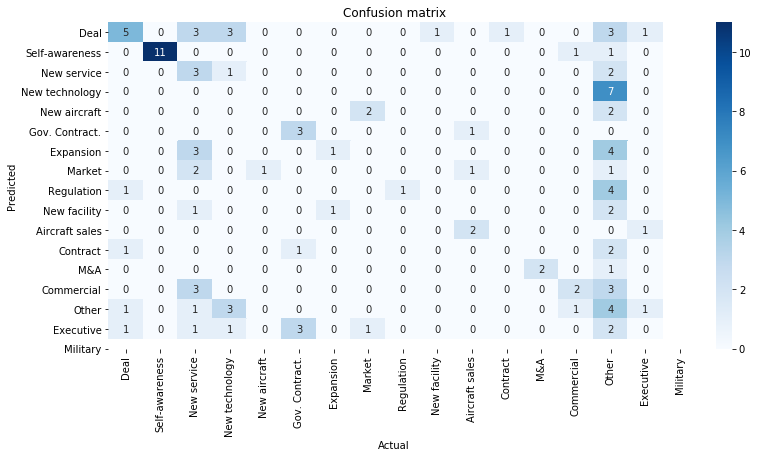

In [96]:
aux_df = df3[['topic', 'topic_code']].drop_duplicates().sort_values('topic_code')
conf_matrix = confusion_matrix(labels_test, rfc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['topic'].values, 
            yticklabels=aux_df['topic'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [104]:
base_model = RandomForestClassifier(random_state = 27)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.26785714285714285